# **TESTES - PARTE 1, PARTE 2 e PARTE 3 (Falso Positivo e Falso Negativo; Precisão/Recall e F1 Score)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
a = pd.read_csv('/content/wine_dataset.csv')

In [ ]:
y = a['style']
X = a.drop('style', axis=1)

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

In [ ]:
modelo = ExtraTreesClassifier()

In [ ]:
modelo.fit(X_treino, y_treino)

ExtraTreesClassifier()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


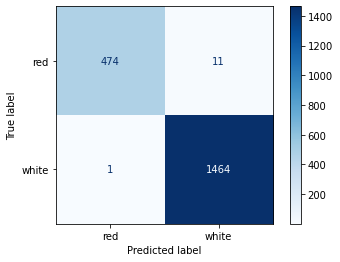

In [ ]:
plot_confusion_matrix(modelo, X_teste, y_teste, cmap=plt.cm.Blues, display_labels=['red', 'white'])

In [ ]:
predictions = modelo.predict(X_teste)

In [ ]:
print(classification_report(y_teste, predictions))

              precision    recall  f1-score   support

         red       1.00      0.98      0.99       485
       white       0.99      1.00      1.00      1465

    accuracy                           0.99      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [ ]:
print(confusion_matrix(y_teste, predictions))

[[ 474   11]
 [   1 1464]]


# **TESTES - PARTE 4 e PARTE 5 (Anomalias e Overfitting)**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.optimize as opt

In [ ]:
import scipy.io as spio
arquivo = '/content/dadosanomalias.mat'
data = spio.loadmat(arquivo)

In [ ]:
X = np.array(data['X'])

X_val = np.array(data['Xval'])
y_val = data['yval'].flatten()

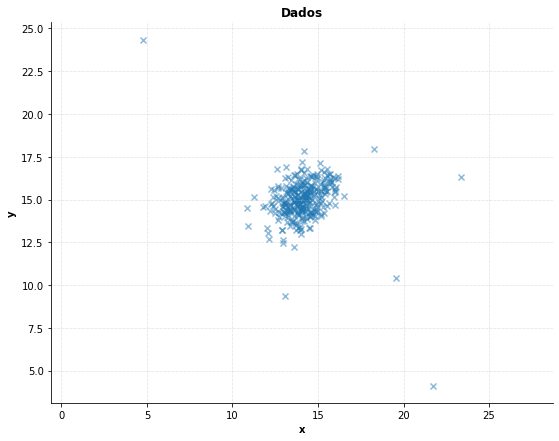

In [ ]:
plt.figure(figsize=(9,7))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Dispersão dos dados
plt.scatter(X[:,0], X[:,1], marker='x', alpha=0.5)


#Configurações visuais adicionais
plt.title('Dados',
          fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.xlabel('x', fontweight='bold')
plt.axis('equal')
sns.despine()

**O que são anomalias?**
Conjunto de pontos de dados que são consideravelmente
diferentes do restante dos dados. Será que estes pontos estão interferindo nos resultados?

**O que são ruídos?**
Valores ou objetos que estão contaminando a base de dados.

Dados registrados de forma equivocada.


# **Validação Cruzada**

Dividindo os dados de treinamento e teste em vários subconjuntos, a validação cruzada permite que os modelos sejam avaliados e comparados a partir de diferentes conjuntos de dados de treinamento e testes. Isso diminui os efeitos de variações nos dados ao longo do tempo, o que pode levar a resultados mais confiáveis e precisos.

A validação cruzada k-fold é útil para avaliar o desempenho de um modelo de ML em diferentes conjuntos de dados, pois permite que você treine e avalie o modelo em todos os dados que você tem. Isso fornece uma estimativa mais precisa sobre como o modelo se comportará quando for usado em novos dados. Além disso, a validação cruzada k-fold pode ser usada para encontrar a melhor combinação de parâmetros para um modelo de ML, pois permite que você teste várias diferentes configurações de parâmetros no mesmo conjunto de dados.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.
from sklearn.linear_model import LinearRegression # Linear Regression class.

In [ ]:
df = pd.read_csv("/content/Admission_Predict.csv")

In [ ]:
df.drop('Serial No.', axis = 1, inplace = True)

In [ ]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [ ]:
model  = LinearRegression()
kfold  = KFold(n_splits=5, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
result = cross_val_score(model, x, y, cv = kfold)

In [ ]:
print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.85715099 0.72307881 0.77098766 0.80243237 0.7975308 ]
Mean R^2 for Cross-Validation K-Fold: 0.7902361271258662
